In [18]:
from __future__ import annotations
from typing import Callable, Sequence, Tuple, List
import numpy as np
import random
from scipy.stats import norm
import sys
sys.path.extend(["../", "../../"])
from rl.function_approx import DNNApprox, LinearFunctionApprox, \
    FunctionApprox, DNNSpec, AdamGradient, Weights
from random import randrange
from numpy.polynomial.laguerre import lagval
from rl.chapter8.optimal_exercise_bin_tree import OptimalExerciseBinTree
from rl.markov_process import NonTerminal
from rl.gen_utils.plot_funcs import plot_list_of_curves

import pickle
import math
from time import time
from typing import Callable, List, Sequence, Tuple, Union
import matplotlib.pyplot as plt
from price_simulator import SimulationPath, PathFactory
from algo_wrapper import AlgoWrapper
from DQL_wrapper import DQL_Learner

import torch
import torch.nn as nn
from DQL_wrapper_pytorch import DQL_P
from optimal_binary_tree_wrapper import OptimalBinaryTreeWrapper
from lspi import LSPI

# Load data
code to generate the data (using price_simulator.py from the repo):

python3 price_simulator.py --folder_path="simulated/" --num_paths=1000

In [3]:
path_fac = PathFactory.from_folder('simulated',num_steps=20)

In [27]:
path_fac_100 = PathFactory.from_folder('simulated',num_steps=1000)

In [4]:
since = time()
training_data = []
for simulation_path in path_fac.paths:
    training_data.extend(simulation_path.get_timed_triplet_path())
print(time()-since)

0.019919872283935547


In [5]:
num_steps = path_fac.paths[0].num_steps

In [6]:
print(len(training_data))

20000


# Payoff function for American Options

In [14]:
def put_payoff_func(p):
    return max(strike_price - p, 0)

# Binary Tree Training

In [15]:
bin_num_steps = 500
BIN_TREE = OptimalBinaryTreeWrapper(path_fac.params.spot_price, path_fac.params.expiry, path_fac.params.rate, path_fac.params.vol, strike_price,bin_num_steps, put_payoff_func)
BIN_TREE.train(path_fac.paths)

# LSPI Training

In [28]:
LSPI_model = LSPI(path_fac_100.params.spot_price, path_fac_100.params.expiry, path_fac_100.params.rate, path_fac_100.params.vol, strike_price, path_fac_100.params.num_steps, put_payoff_func)
LSPI_model.train(path_fac_100.paths)

LOADING TRAIN DATA
TIME TAKEN TO LOAD : 0.276
STARTING TRAINING
LENGTH OF TRAINING DATA :1000000
TIME TAKEN TO TRAIN : 220.516


# Deep Q-Learning Training

In [7]:
strike_price = 100.
spot_price = 100.
DQLL = DQL_P(spot_price = spot_price,
                    expiry = 1.0,
                    rate = 0.05,
                    vol = 0.25,
                    strike = 100.0,
                    num_steps=20,
                    payoff_func = lambda y : np.maximum(strike_price-y,0))

Sequential(
  (0): Linear(in_features=6, out_features=6, bias=True)
  (1): ReLU()
  (2): Linear(in_features=6, out_features=1, bias=True)
  (3): Softplus(beta=-1, threshold=20)
  (4): Linear(in_features=1, out_features=1, bias=True)
)


In [8]:
DQLL.train(training_data,num_steps,training_iters=200000)
DQLL.train(training_data,num_steps,training_iters=200000)

STARTING TRAINING


  0%|                                   | 162/200000 [00:00<02:03, 1615.78it/s]

tensor(4998.0371, grad_fn=<MeanBackward0>)


 10%|███▎                             | 20397/200000 [00:09<01:23, 2152.03it/s]

tensor(1.9728, grad_fn=<MeanBackward0>)


 20%|██████▋                          | 40373/200000 [00:19<01:14, 2144.12it/s]

tensor(5.3620, grad_fn=<MeanBackward0>)


 30%|█████████▉                       | 60431/200000 [00:28<01:04, 2155.33it/s]

tensor(2.6832, grad_fn=<MeanBackward0>)


 40%|█████████████▏                   | 80279/200000 [00:37<00:56, 2130.84it/s]

tensor(8.5399, grad_fn=<MeanBackward0>)


 50%|████████████████                | 100267/200000 [00:47<00:47, 2082.19it/s]

tensor(4.5998, grad_fn=<MeanBackward0>)


 60%|███████████████████▏            | 120282/200000 [00:56<00:37, 2136.10it/s]

tensor(3.0606, grad_fn=<MeanBackward0>)


 70%|██████████████████████▍         | 140284/200000 [01:06<00:27, 2134.05it/s]

tensor(1.9444, grad_fn=<MeanBackward0>)


 80%|█████████████████████████▋      | 160414/200000 [01:15<00:18, 2191.72it/s]

tensor(3.2909, grad_fn=<MeanBackward0>)


 90%|████████████████████████████▊   | 180360/200000 [01:24<00:09, 2141.58it/s]

tensor(8.1013, grad_fn=<MeanBackward0>)


100%|████████████████████████████████| 200000/200000 [01:33<00:00, 2131.43it/s]


TIME TAKEN TO TRAIN : 93.856
STARTING TRAINING


  0%|                                   | 211/200000 [00:00<01:34, 2109.10it/s]

tensor(0.8589, grad_fn=<MeanBackward0>)


 10%|███▎                             | 20327/200000 [00:09<01:23, 2158.99it/s]

tensor(1.1800, grad_fn=<MeanBackward0>)


 20%|██████▋                          | 40408/200000 [00:18<01:13, 2167.44it/s]

tensor(8.5147, grad_fn=<MeanBackward0>)


 30%|█████████▉                       | 60238/200000 [00:28<01:04, 2162.31it/s]

tensor(8.4845, grad_fn=<MeanBackward0>)


 40%|█████████████▎                   | 80353/200000 [00:37<00:55, 2149.57it/s]

tensor(4.7568, grad_fn=<MeanBackward0>)


 50%|████████████████                | 100423/200000 [00:46<00:46, 2143.96it/s]

tensor(2.7955, grad_fn=<MeanBackward0>)


 60%|███████████████████▏            | 120300/200000 [00:56<00:37, 2143.74it/s]

tensor(1.9506, grad_fn=<MeanBackward0>)


 70%|██████████████████████▍         | 140249/200000 [01:05<00:27, 2175.33it/s]

tensor(4.7535, grad_fn=<MeanBackward0>)


 80%|█████████████████████████▋      | 160401/200000 [01:14<00:18, 2185.61it/s]

tensor(8.1163, grad_fn=<MeanBackward0>)


 90%|████████████████████████████▊   | 180309/200000 [01:24<00:09, 2156.41it/s]

tensor(4.3608, grad_fn=<MeanBackward0>)


100%|████████████████████████████████| 200000/200000 [01:33<00:00, 2141.43it/s]

TIME TAKEN TO TRAIN : 93.397


# Evaluation : 1) Continuation Curves

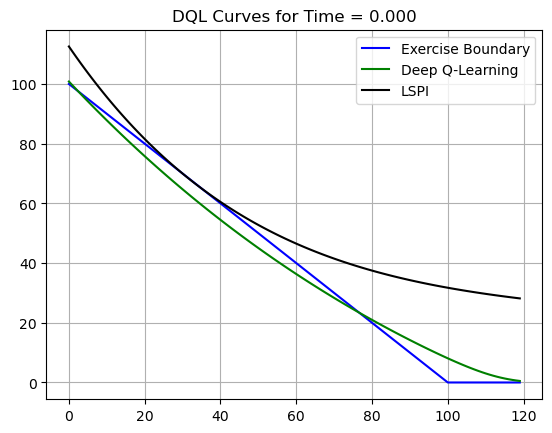

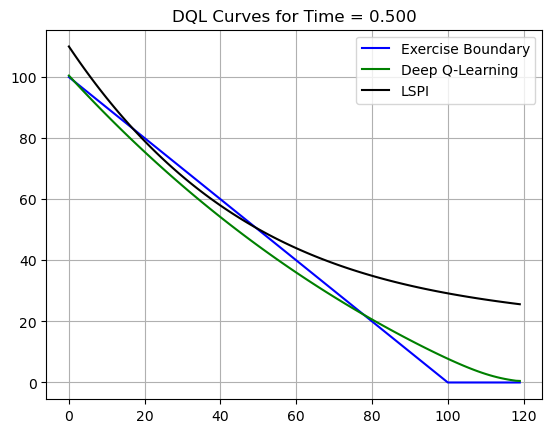

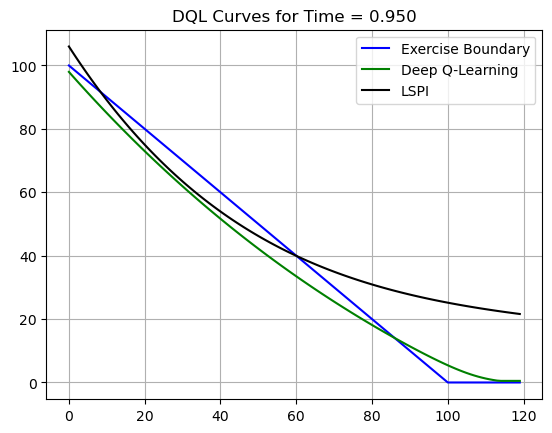

In [34]:
num_steps_dql: int = 20
expiry = 1.0

for step in [0, int(num_steps_dql / 2), num_steps_dql - 1]:
    t = step * expiry / num_steps_dql
    prices = np.arange(120.0)
    exer_curve = DQLL.exercise_curve(
        prices=prices
    )
    dql_cont_curve = DQLL.continuation_curve(
        time_to_expiry=expiry-t,
        prices=prices
    )
    lspi_cont_curve = LSPI_model.continuation_curve(
        time_to_expiry=expiry-t,
        prices=prices
    )
    plt.plot(
        prices,
        exer_curve,
        "b",label="Exercise Boundary")
    plt.plot(
        prices,
        dql_cont_curve,
        "g", label="Deep Q-Learning")
    plt.plot(
        prices,
        lspi_cont_curve,
        "k", label="LSPI"
    )
    
    plt.legend()
    plt.grid()
    plt.title(f"DQL Curves for Time = {t:.3f}")
    plt.show()


# Evaluation : 2) Optimal Exercise Boundaries

BIN_TREE : 30.54435396194458
DQLL : 3.5421347618103027
LSPI : 1.4868690967559814


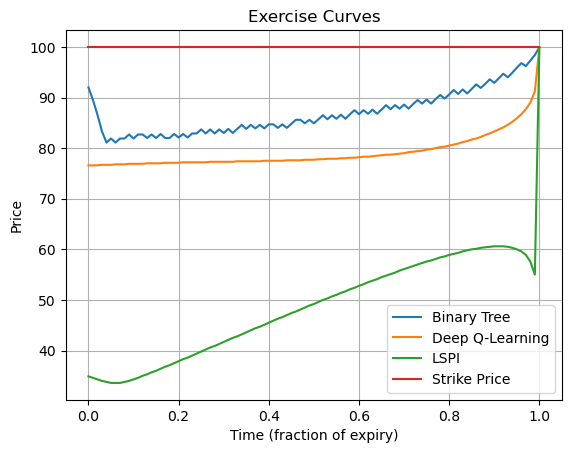

In [29]:
since = time()
x, y = BIN_TREE.put_option_exercise_boundary(100)
print(f"BIN_TREE : {time() - since}")
plt.plot(x, y, label="Binary Tree")

since = time()
x, y = DQLL.put_option_exercise_boundary(100)
print(f"DQLL : {time() - since}")
plt.plot(x, y, label="Deep Q-Learning")

since = time()
x, y = LSPI_model.put_option_exercise_boundary(100)
print(f"LSPI : {time() - since}")
plt.plot(x, y, label="LSPI")

plt.plot(x,[strike_price]*len(x),label='Strike Price')

plt.title('Exercise Curves')
plt.xlabel('Time (fraction of expiry)')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid()

# Additional Plots for Binary Tree

Initialize the OptimalBinaryTreeWrapper
Training the optimal binary tree
Exercise boundary:
Initialize the OptimalBinaryTreeWrapper
Training the optimal binary tree
Exercise boundary:
Initialize the OptimalBinaryTreeWrapper
Training the optimal binary tree
Exercise boundary:
Initialize the OptimalBinaryTreeWrapper
Training the optimal binary tree
Exercise boundary:
Initialize the OptimalBinaryTreeWrapper
Training the optimal binary tree
Exercise boundary:


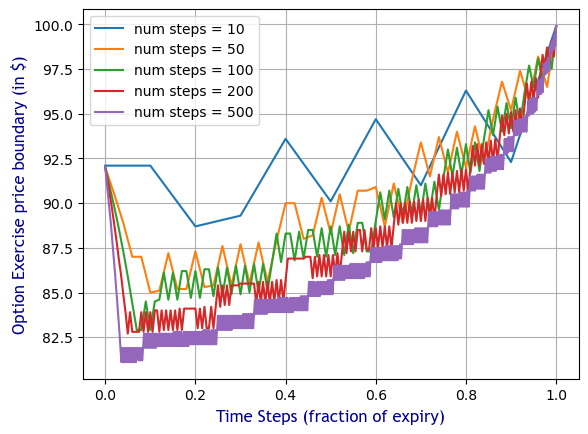

In [36]:
# Backwards Induction plots
def plotBinaryTree():
    steps = [10, 50, 100, 200, 500]
    optBinTree = BIN_TREE
    for step in steps:

        print("Initialize the OptimalBinaryTreeWrapper")
        optBinTree.num_steps = step

        print("Training the optimal binary tree")
        optBinTree.train()

        print("Exercise boundary:")
        x, y = optBinTree.put_option_exercise_boundary(optBinTree.num_steps)
        label = "num steps = " + str(step)
        plt.plot(x, y, label=label)

    font = {'family': 'Trebuchet MS',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 12,
        }
    plt.xlabel("Time Steps (fraction of expiry)", fontdict=font)
    plt.ylabel("Option Exercise price boundary (in $)", fontdict=font)
    plt.legend()
    plt.grid()
    plt.show()

plotBinaryTree()

Initialize the OptimalBinaryTreeWrapper
Training the optimal binary tree
Initialize the OptimalBinaryTreeWrapper
Training the optimal binary tree
Initialize the OptimalBinaryTreeWrapper
Training the optimal binary tree
Initialize the OptimalBinaryTreeWrapper
Training the optimal binary tree
Initialize the OptimalBinaryTreeWrapper
Training the optimal binary tree
Initialize the OptimalBinaryTreeWrapper
Training the optimal binary tree
Initialize the OptimalBinaryTreeWrapper
Training the optimal binary tree
Initialize the OptimalBinaryTreeWrapper
Training the optimal binary tree
Initialize the OptimalBinaryTreeWrapper
Training the optimal binary tree
Initialize the OptimalBinaryTreeWrapper
Training the optimal binary tree


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


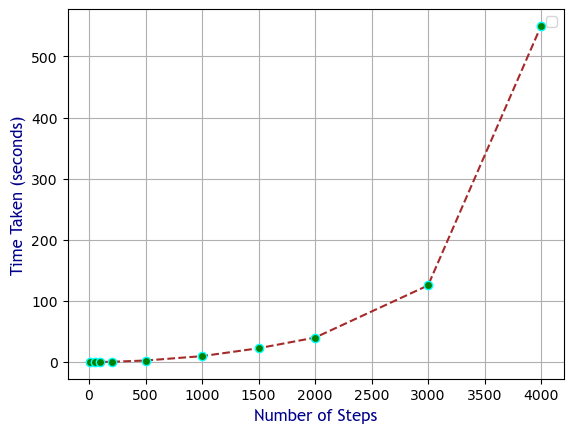

In [41]:
# Backwards Induction time to train plot
def plotBinaryTreeTime():
    steps = [10, 50, 100, 200, 500, 1000, 1500, 2000, 3000, 4000]
    optBinTree = BIN_TREE
    x = []
    y = []
    for step in steps:

        print("Initialize the OptimalBinaryTreeWrapper")
        optBinTree.num_steps = step

        print("Training the optimal binary tree")
        start = time()
        optBinTree.train()
        end = time()

        x.append(step)
        y.append(end - start)

    font = {'family': 'Trebuchet MS',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 12,
        }
    plt.plot(x, y, color="brown", marker="o",  linestyle="--", mfc='green', mec='cyan')
    plt.xlabel("Number of Steps", fontdict=font)
    plt.ylabel("Time Taken (seconds)", fontdict=font)
    plt.legend()
    plt.grid()
    plt.show()

plotBinaryTreeTime()